# EXPLORATORY ANALYSIS BASED ON QNPy model results

In order to understand obtained data, we will analyze it further by visual exploration

In [11]:
import os

# checking if folders for future exploration exist 

folders_needed = ['./stimulus_results/']

for folder in folders_needed:
    if not os.path.exists(folder):
        os.makedirs(folder)
    else: 
        print (f'- Folder - {folder} - already exists')

# finding path for each prediction csv file 

filepath_train = './output/predictions/train/data/'  # for example: './my_data/'
filepath_test = './output/predictions/test/data/'  # for example: './my_data/'
filepath_val = './output/predictions/val/data/'  # for example: './my_data/'


train_list = list(filter(lambda x: '.csv' in x, os.listdir(filepath_train)))
test_list = list(filter(lambda x: '.csv' in x, os.listdir(filepath_test)))
val_list = list(filter(lambda x: '.csv' in x, os.listdir(filepath_val)))

train_files = []
test_files = []
val_files = []

for i in train_list:
    train_files.append(filepath_train + i)

for i in test_list:
    test_files.append(filepath_test + i)
    
for i in val_list:
    val_files.append(filepath_val + i)

    
# filepaths for all prediction .csv files 
all_files = train_files + test_files + val_files 
# all_files

- Folder - ./stimulus_results/ - already exists


In [12]:
# defining scales and group names
scale_names= ['lepo', 'prijatno', 'privlacno', 'skladno']
group_names = ['fb', 'fw', 'mb', 'mw']

In [3]:
# function for finding data for only one group
def find_group (sub_nr, file):    
    group_data=[]
    for s in file:
        if s.find(f'_{sub_nr}')>= 1:
            group_data.append(s)
    return group_data

# function for finding order of apperance of the separate scales 
def find_order (scale_data):
    order_data=[]
    for o in scale_data:
        if o.find('lepo')>= 1:
            order_data.append('lepo')
        elif o.find('prijatno')>= 1:
            order_data.append('prijatno')
        elif o.find('privlacno')>= 1:
            order_data.append('privlacno')
        elif o.find('skladno')>= 1:
            order_data.append('skladno')
    return order_data

In [4]:
# checking if it is working
gr=find_group('fw', all_files)
print(gr)
find_order(gr)

['./output/predictions/train/data/lepo_fw_original_split4_predictions.csv', './output/predictions/train/data/prijatno_fw_original_split16_predictions.csv', './output/predictions/train/data/privlacno_fw_original_split28_predictions.csv', './output/predictions/test/data/skladno_fw_original_split40_predictions.csv']


['lepo', 'prijatno', 'privlacno', 'skladno']

In [5]:
import pandas as pd
import collections 
import matplotlib.pyplot as plt

# defining parameters for plotting (and plotting it)

def find_group_plot (number):
    group = find_group(number, all_files)
    order=find_order(group)
    df_list = (pd.read_csv(file) for file in group)
    data = pd.concat(df_list, axis=1)
    data.set_axis(['time', order[0], f'{order[0]}_err',
                   'mjd2', order[1], f'{order[1]}_err', 
                   'mjd3', order[2], f'{order[2]}_err', 
                   'mjd4', order[3], f'{order[3]}_err'], axis='columns', inplace=True)
    data.drop(['mjd2', 'mjd3', 'mjd4'], axis=1)
    
#     plot data for that group
    plt.rcParams["figure.figsize"] = [7.00, 3.50] 
    plt.rcParams["figure.autolayout"] = True
    
    plt.subplots()
    plt.plot(data['time'], data['lepo'], linestyle='-', linewidth=1.3, color='b', label='lepo')
    plt.plot(data['time'], data['privlacno'], linestyle='-', linewidth=1.3, color='r', label='privlacno')
    plt.plot(data['time'], data['skladno'], linestyle='-', linewidth=1.3, color='g', label = 'skladno')
    plt.plot(data['time'], data['prijatno'], linestyle='-', linewidth=1.3, color='y', label = 'prijatno')


    plt.fill_between(
            data['time'],
            data['lepo'] - data['lepo_err'],
            data['lepo'] + data['lepo_err'],
            alpha=0.1,
            facecolor='b',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['privlacno'] - data['privlacno_err'],
            data['privlacno'] + data['privlacno_err'],
            alpha=0.1,
            facecolor='r',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['skladno'] - data['skladno_err'],
            data['skladno'] + data['skladno_err'],
            alpha=0.2,
            facecolor='g',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['prijatno'] - data['prijatno_err'],
            data['prijatno'] + data['prijatno_err'],
            alpha=0.3,
            facecolor='y',
            interpolate=True)

    plt.legend()
    plt.xlabel('time')
    plt.ylabel ('rt')

    plt.yticks([-2, 0, 2], fontsize=16)
    plt.xticks([-2, 0, 2], fontsize=16)
    plt.ylim([-2, 2])
    plt.grid('off')
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.title(f'group {number}')
    
    
    
    plt.savefig(f'./stimulus_results/stimuli_group_{number}.jpg')
    plt.show()

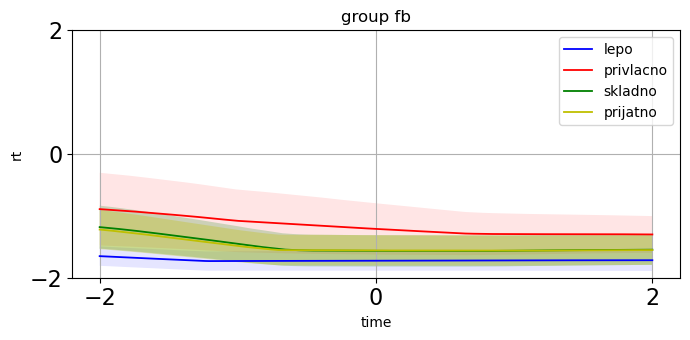

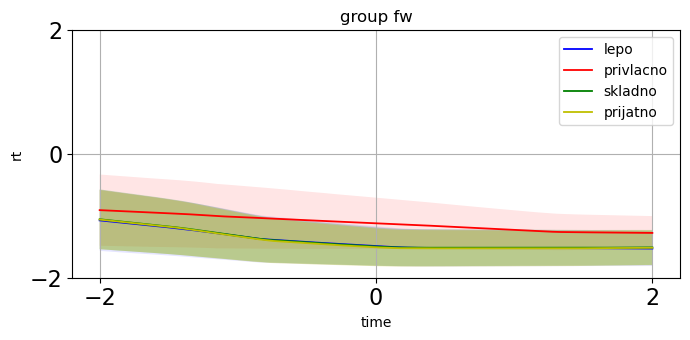

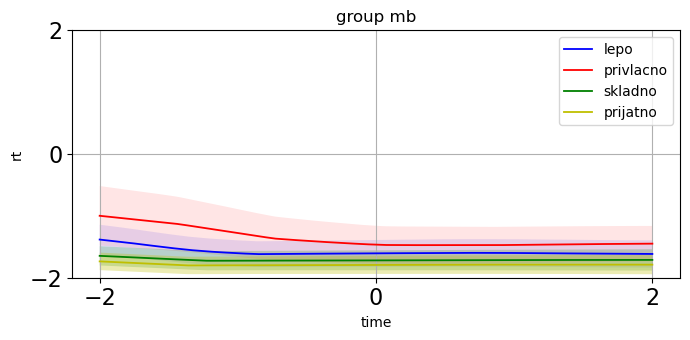

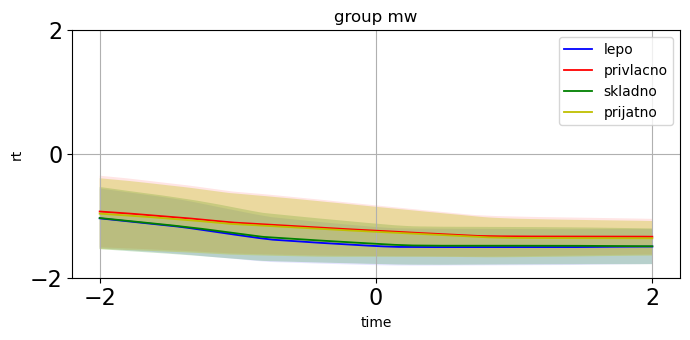

In [6]:
# plotting the results for each group

for a in group_names:
    find_group_plot(a) 

# Lets plot it in another way

it would be more informative if we plot the results for each scale separately in order to compare reaction time for separate groups of stimuli 

In [7]:
# function for finding data for one scale

def find_scale (scale, file):    
    scale_data=[]
    for s in file:
        if s.find(f'{scale}')>= 1:
            scale_data.append(s)            
    
    return scale_data

# fnction for finding order of apperance of each group
def find_order (scale_data):
    order_data=[]
    for o in scale_data:
        if o.find('fb')>= 1:
            order_data.append('fb')
        elif o.find('fw')>= 1:
            order_data.append('fw')
        elif o.find('mb')>= 1:
            order_data.append('mb')
        elif o.find('mw')>= 1:
            order_data.append('mw')
    return order_data

In [8]:
# checking if it works
pronadji = find_scale('lepo', all_files)
print(pronadji)
find_order(pronadji)

['./output/predictions/train/data/lepo_fw_original_split4_predictions.csv', './output/predictions/train/data/lepo_mw_original_split10_predictions.csv', './output/predictions/val/data/lepo_fb_original_split1_predictions.csv', './output/predictions/val/data/lepo_mb_original_split7_predictions.csv']


['fw', 'mw', 'fb', 'mb']

In [9]:
import pandas as pd
import collections 
import matplotlib.pyplot as plt

# function for plotting data for each scale separately in order to compare results based on stimuli groups (gender x race)

def find_scale_plot (scale):
    scales = find_scale(scale, all_files)
    order=find_order(scales)
    df_list = (pd.read_csv(file) for file in scales)
    data = pd.concat(df_list, axis=1)
    data.set_axis(['time', order[0], f'{order[0]}_err',
                   'mjd2', order[1], f'{order[1]}_err', 
                   'mjd3', order[2], f'{order[2]}_err', 
                   'mjd4', order[3], f'{order[3]}_err'], axis='columns', inplace=True)
    data=data.drop(['mjd2', 'mjd3', 'mjd4'], axis=1)

    #     plot data for that subject
    plt.subplots()
    plt.rcParams["figure.figsize"] = [7.00, 3.50] 
    plt.rcParams["figure.autolayout"] = True

    
    plt.plot(data['time'], data['mw'], linestyle='-', linewidth=1.3, color='b', label='mw')
    plt.plot(data['time'], data['fw'], linestyle='-', linewidth=1.3, color='r', label='fw')
    plt.plot(data['time'], data['mb'], linestyle='-', linewidth=1.3, color='g', label = 'mb')
    plt.plot(data['time'], data['fb'], linestyle='-', linewidth=1.3, color='y', label = 'fb')


    plt.fill_between(
            data['time'],
            data['mw'] - data['mw_err'],
            data['mw'] + data['mw_err'],
            alpha=0.1,
            facecolor='b',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['fw'] - data['fw_err'],
            data['fw'] + data['fw_err'],
            alpha=0.1,
            facecolor='r',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['mb'] - data['mb_err'],
            data['mb'] + data['mb_err'],
            alpha=0.2,
            facecolor='g',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['fb'] - data['fb_err'],
            data['fb'] + data['fb_err'],
            alpha=0.3,
            facecolor='y',
            interpolate=True)

    plt.legend()
    plt.xlabel('time')
    plt.ylabel ('rt')

    plt.yticks([-2, 0, 2], fontsize=16)
    plt.xticks([-2, 0, 2], fontsize=16)
    plt.ylim([-2, 2])
    plt.grid('off')
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.title(f'Scale {scale}')
    
  
    
    plt.savefig(f'./stimulus_results/scale_{scale}.jpg')
    plt.show()

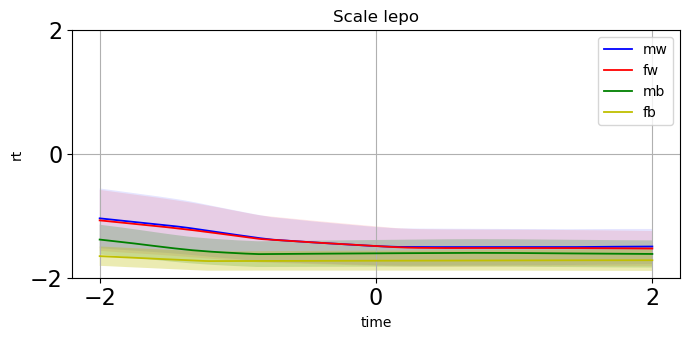

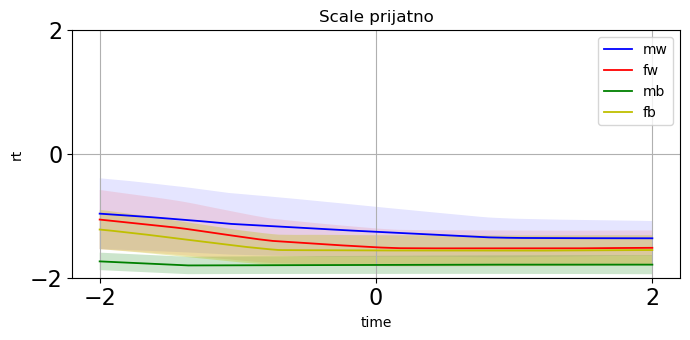

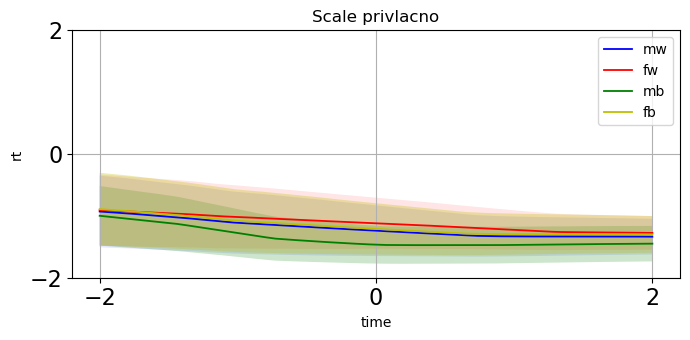

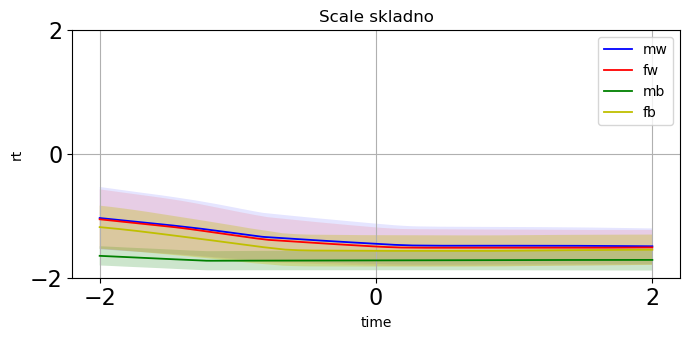

In [10]:
# ploting all data 
for s in scale_names:
    find_scale_plot(s) 

In this way we obtained more insightful results
* for all scales, but especially 'beauty', there is longer reaction time for own faces
    * white > black
    * female > male 
        * potential explanation: there is better discrimination of own-race faces, that require longer processing
* this own-race effect remains in the first half of experiment, and then decreases 
* in the second part of the experiment, all groups gender x race performs almost equal 
* it would be interesting to test differences between groups using ANOVA or some appropriate regression model 
* further oportunities for testing should be explored 

All the data used in this study could be analyzed in many different manners
* in future, we can analyze larger amount of the data (only 1/4 is presented in this study)
* we could choose variables differently, for example, we could sort timeseries based on the race and gender separately (instead of interaction) and that can give us insight into more specific effects 
* we could use experimental setings as variable (that was our primary goal in original experiment, but requires complex desing of arranging data, factors and dependent variables)

Some interesting insights:
* analysis obtained for subjects show better fitting than analysis for stimuli groups 
* potential explanation: usage of different factors as time variable 
    * for subject analysis - time in experiment (ms) was used providing better time differentiation 
    * for stimuli group analysis  - presentation order in experiment (1 - ~80) was used 
        * it was only option since time in experiment is specific for each subject, while presentation order is always within the same range 
    * it should be considered to find a way of redefining time in experiment variable in order to provide better fit of the QNPy model 